# Explorer Notebook

This notebook contains code to run the experiments presented in our paper.

## Setup

In this section, all imports, routes, and variables are specified.

In [1]:
# Import code from scripts
import scripts.framework as fr
import scripts.headrpp_alg as headrpp
import scripts.dijkstra_alg as dijkstra
import scripts.NSGA2 as nsga2
import scripts.single_objective as single_objective
from scripts.comparator import Comparator

In [2]:
# Routes
route1 = [48, 433, 0, 142]
route2 = [103, 322, 88, 134]
route3 = [133, 334, 120, 83]

# Variables
nr_generations = 200
nr_gen_headrpp = 200
nr_gen_nsga2 = 200
pop_size_sp = 50
pop_size_nl = 10
p_crossover = 0.8
p_mutation = 0.3
group_size = 2
nr_runs = 100

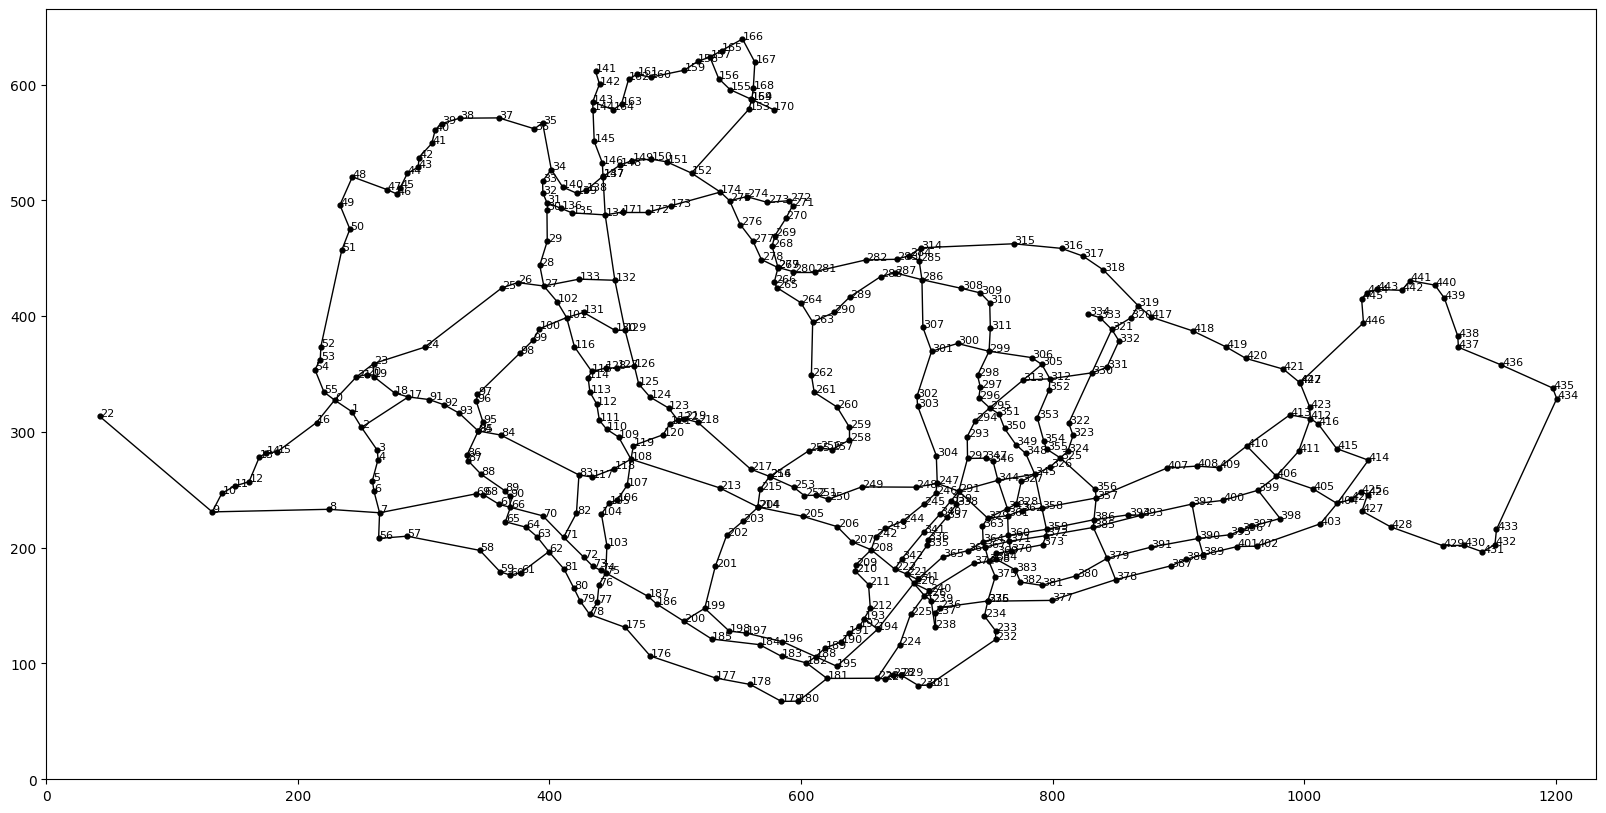

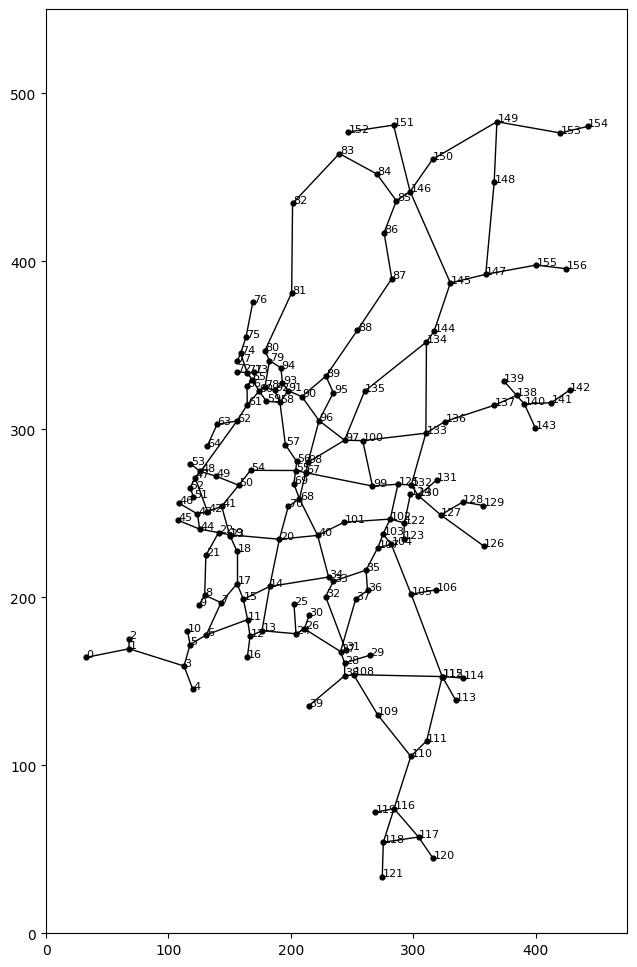

In [3]:
# Create representation objects
repr_sp = fr.Representation("./data/nodes_sp.csv", "./data/edges_sp.csv", maptype="sp")
repr_sp.plot_map(plot_nodes=True)

repr_nl = fr.Representation("./data/nodes_nl.csv", "./data/edges_nl.csv", maptype="nl")
repr_nl.plot_map(plot_nodes=True)

## Single-objective comparison between HEADRPP, NSGA-II and Dijkstra

Below, we perform one run of the single-objective comparison. The weights and route can be changed to reproduce our results presented in the paper.

In [4]:
# Variables
start_node_sp, end_node_sp, start_node_nl, end_node_nl = route1 # or route2 or route3
weights = [1, 0, 0, 0]
version = "Route1"

# Note that the number of runs is set to 1 here for demonstration purposes. 
# If you want to run the algorithm the original amount of times, comment out the line below. 
# (This can take 10-15 hours depending on your machine)
nr_runs = 1

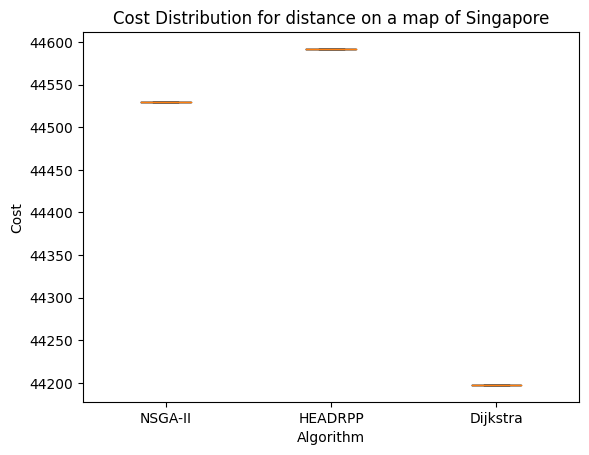

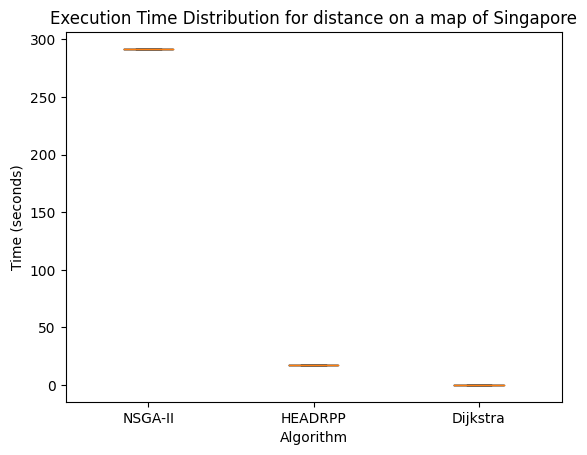

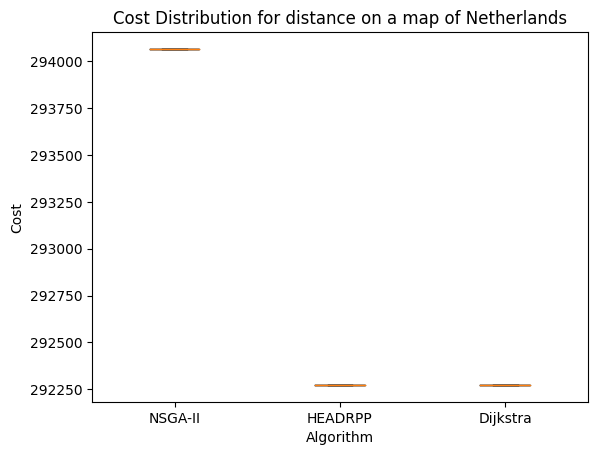

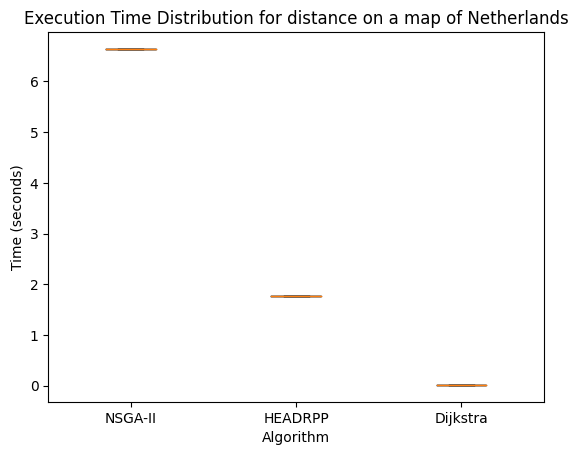

In [5]:
# Singapore
single_objective.run_single_objective_comp(version, repr_sp, start_node_sp, end_node_sp, pop_size_sp, nr_gen_headrpp, nr_gen_nsga2, nr_runs, "Singapore", weights)

# Netherlands
single_objective.run_single_objective_comp(version, repr_nl, start_node_nl, end_node_nl, pop_size_nl, nr_gen_headrpp, nr_gen_nsga2, nr_runs, "Netherlands", weights)

## Multi-objective comparison between HEADRPP and NSGA-II

Below, we perform one run of the multi-objective comparison. The weights and route can be changed to reproduce our results presented in the paper.

Running comparison:   0%|          | 0/1 [00:00<?, ?it/s]

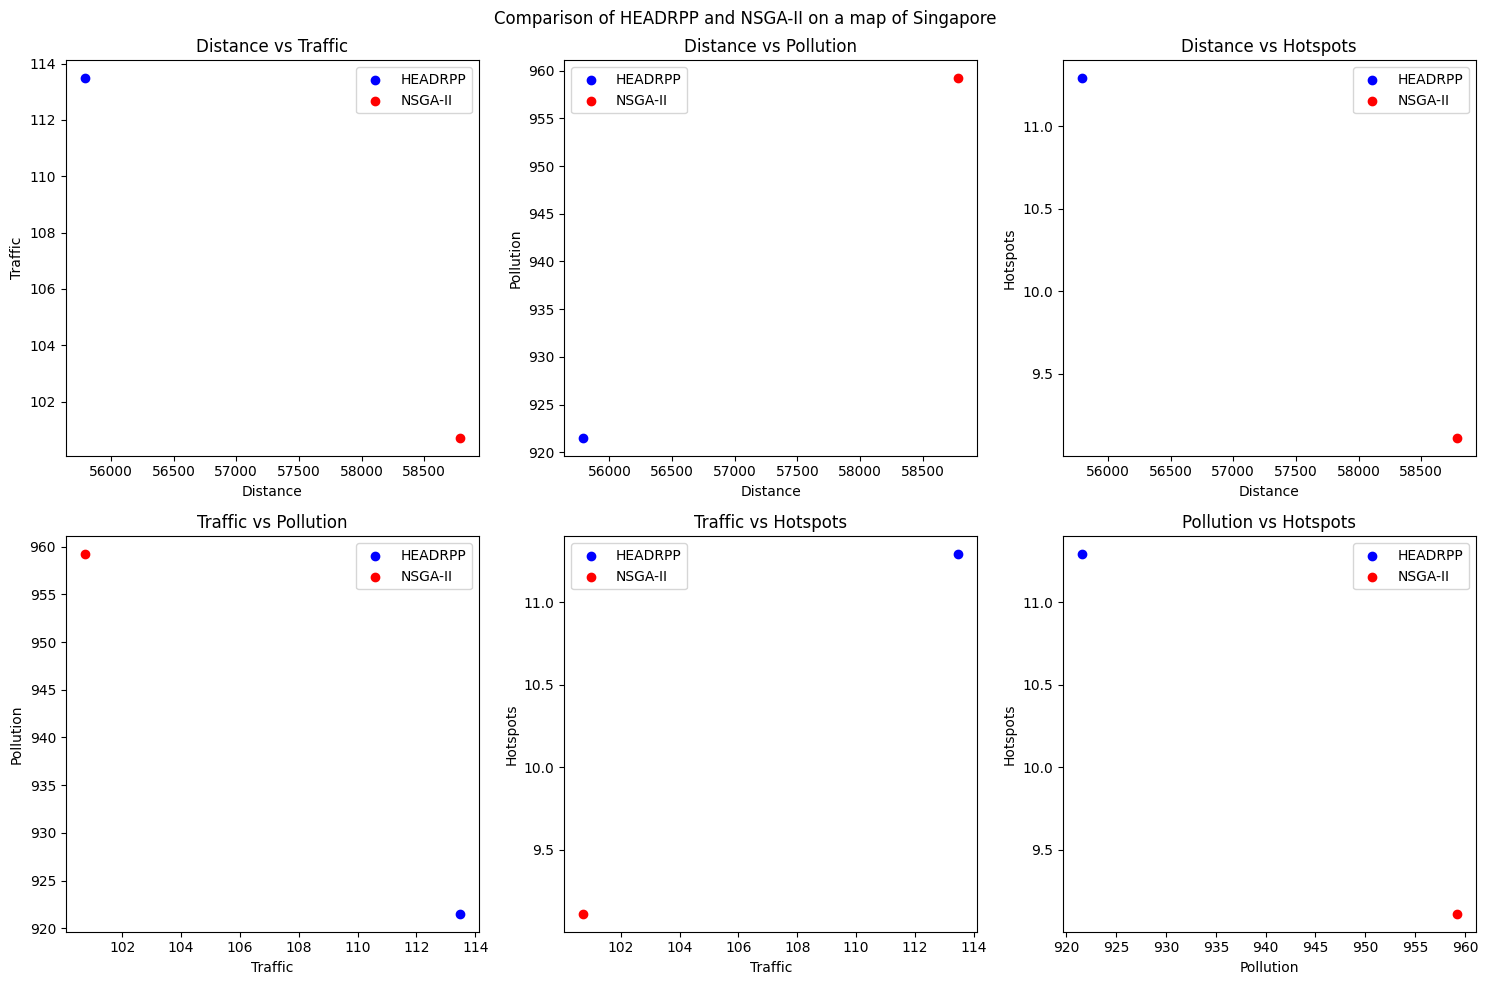

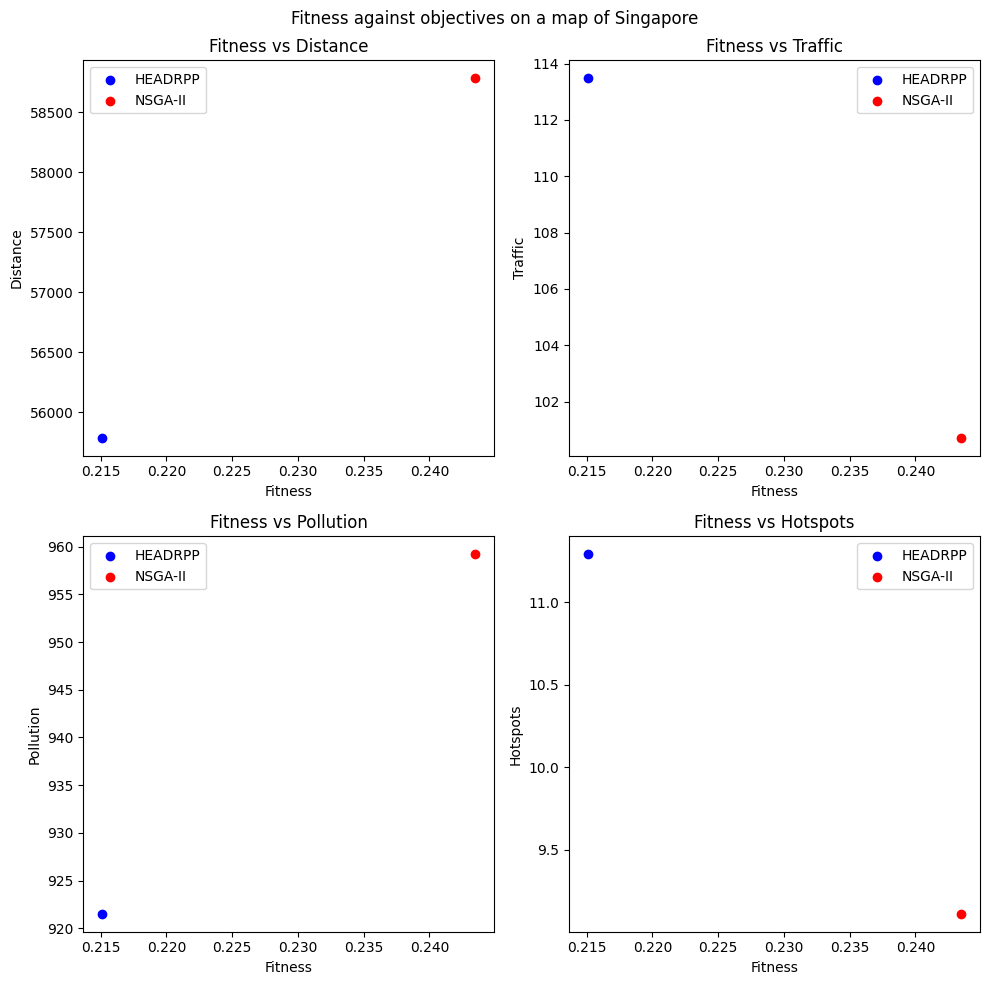

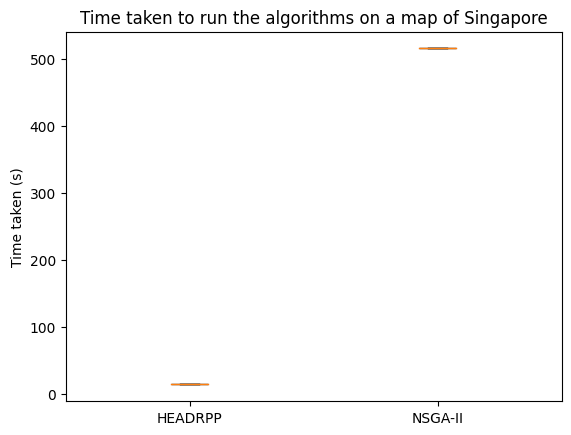

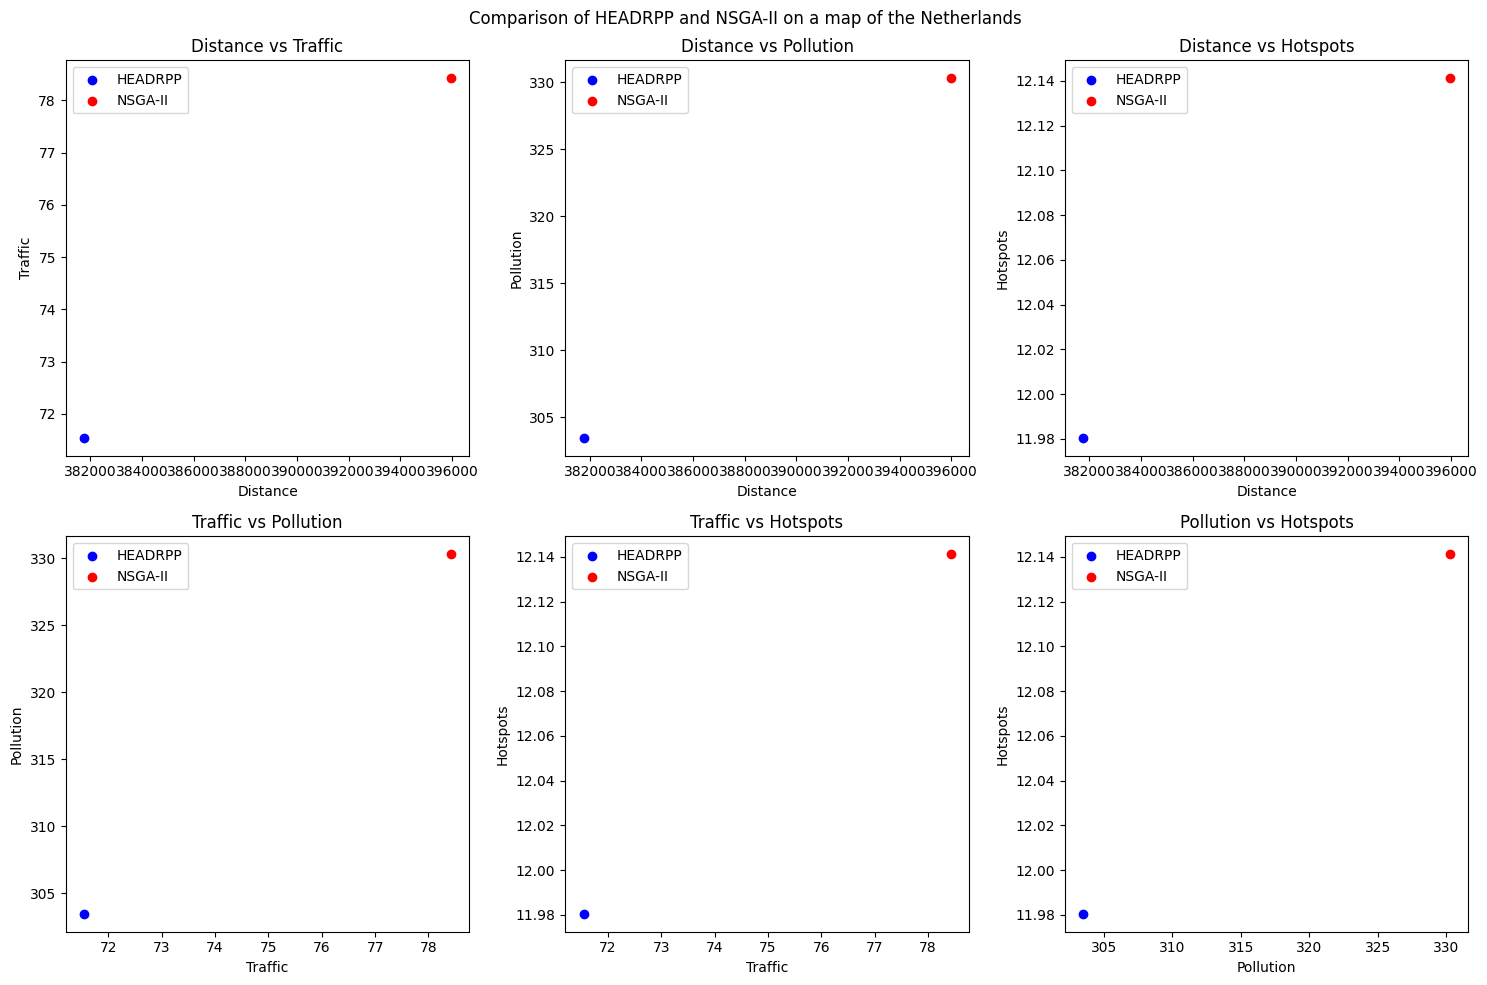

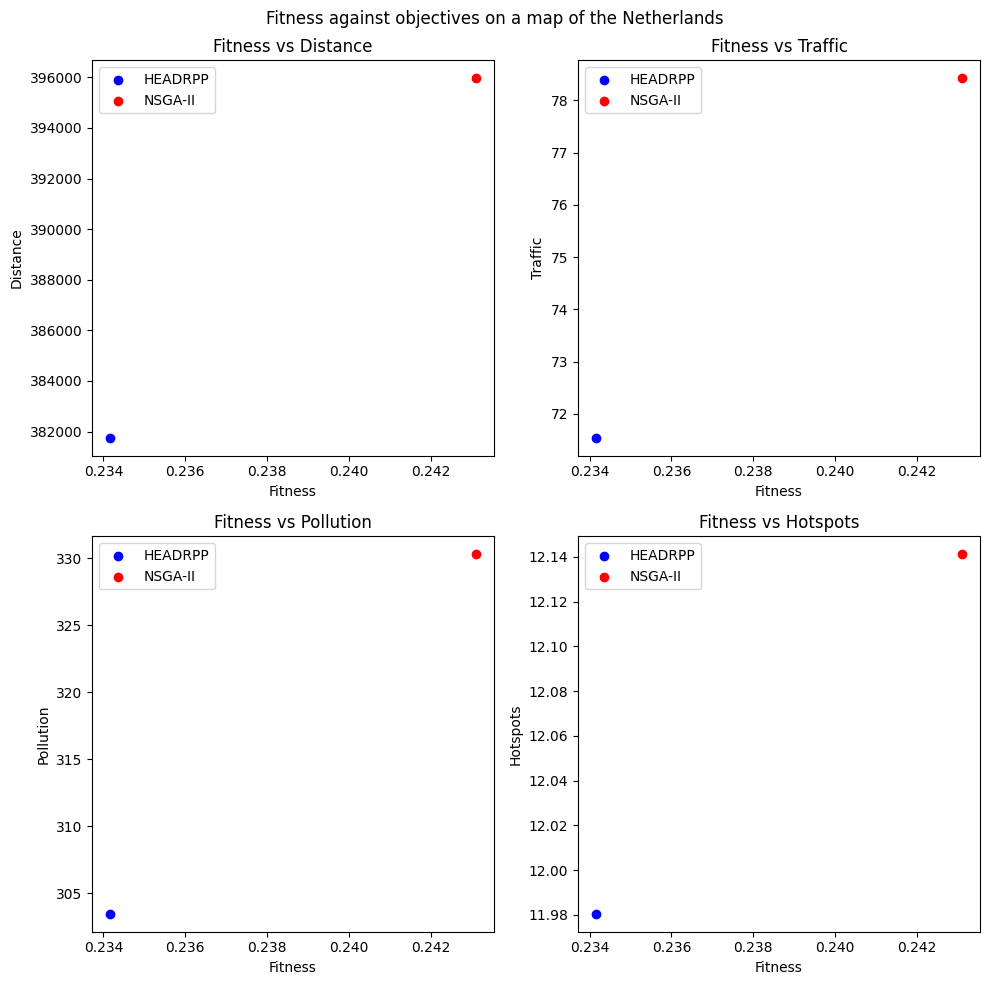

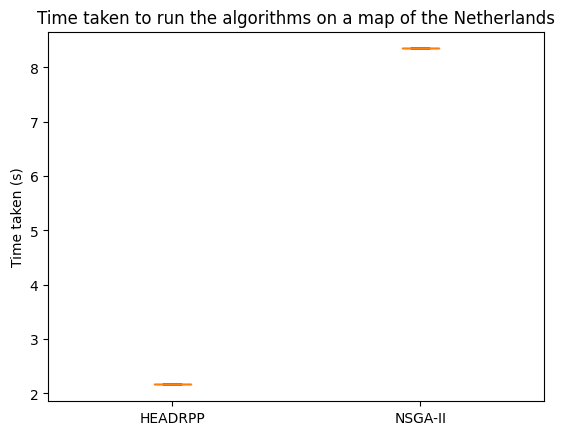

In [6]:
# Note that the number of runs is set to 1 here for demonstration purposes. 
# If you want to run the algorithm the original amount of times, comment out the line below. 
# (This can take 15-20 hours depending on your machine)
nr_runs = 1
weights = [1/4, 1/4, 1/4, 1/4] # order: distance, traffic, pollution, hotspots

# Start and end nodes
start_node_sp, end_node_sp, start_node_nl, end_node_nl = route1 # or route2 or route3

comp = Comparator(pop_size_sp, pop_size_nl, nr_gen_headrpp, nr_gen_nsga2, weights, p_crossover, p_mutation, group_size)
comp.run_comparison(nr_runs, start_node_sp, end_node_sp, start_node_nl, end_node_nl)

## Single sample runs for Dijkstra, HEADRPP, and NSGA-II

This section is used to look at specific settings and single runs of the algorithms. This is the main source for the detailed analyses in our paper. 

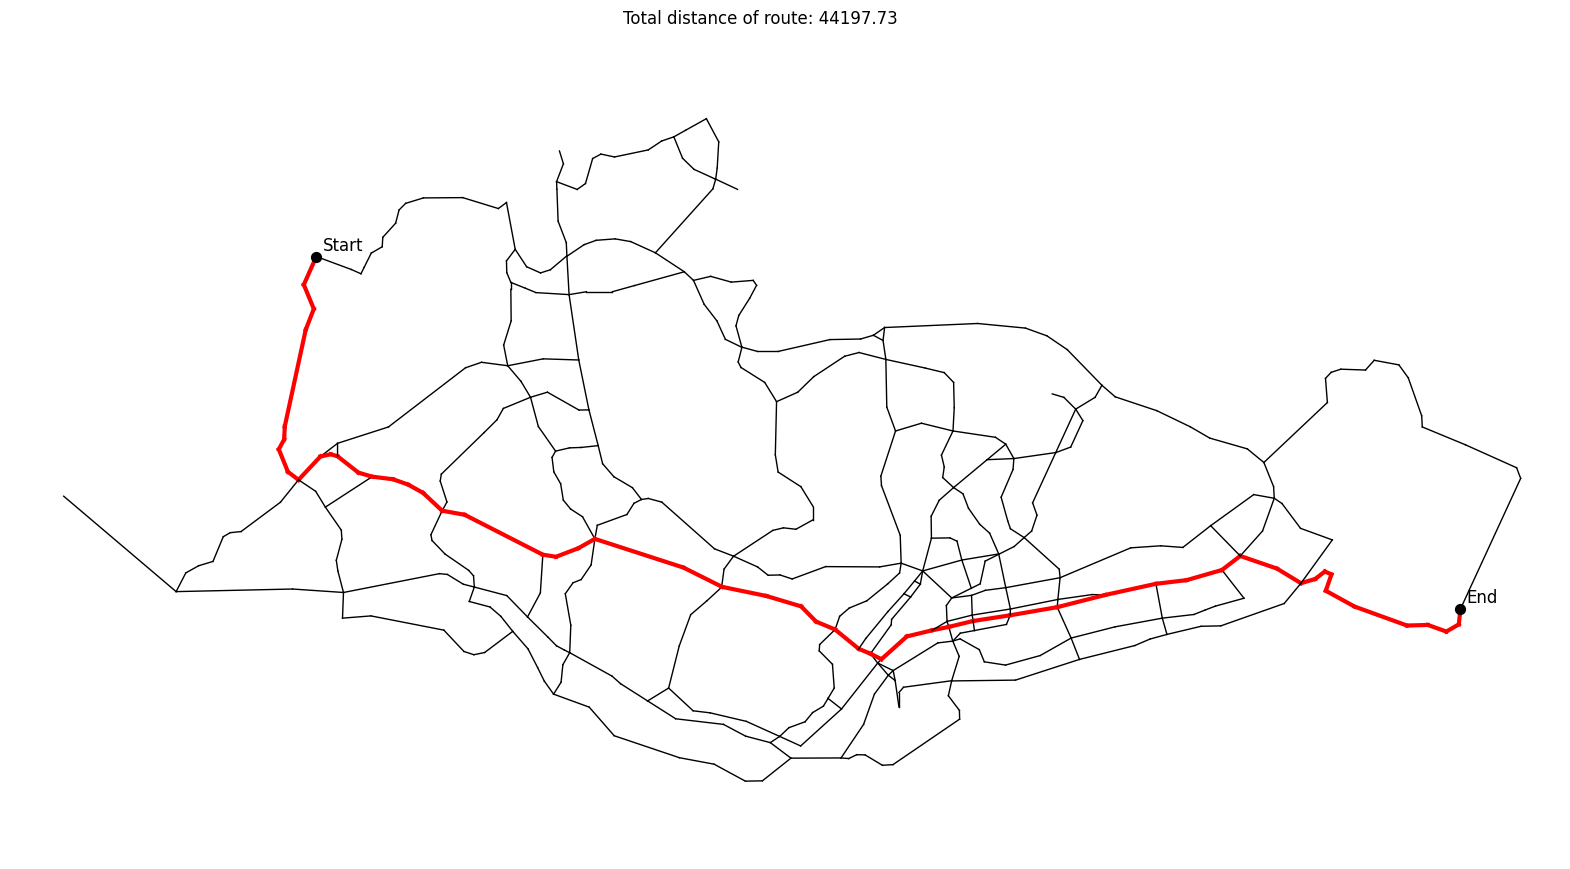

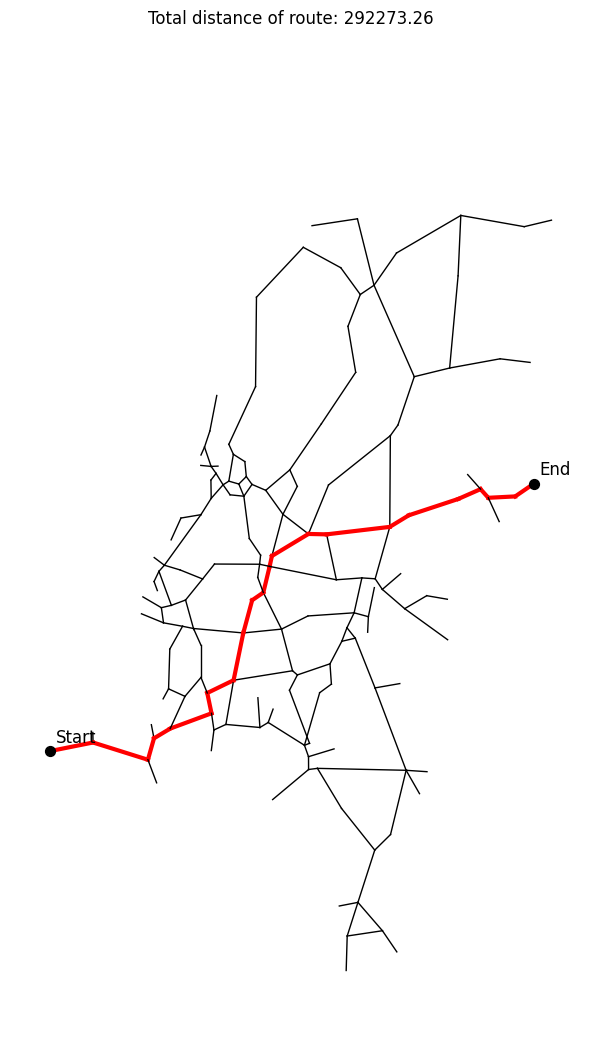

In [7]:
# Dijkstra's algorithm

weights = [1, 0, 0, 0] # order: distance, traffic, pollution, hotspots

# Singapore
alg = dijkstra.DIJKSTRA(repr_sp, start_node_sp, end_node_sp)
route, cost = alg.run_algorithm(show_results=True, weights=weights)

# Netherlands
alg = dijkstra.DIJKSTRA(repr_nl, start_node_nl, end_node_nl)
route, cost = alg.run_algorithm(show_results=True, weights=weights)

Running HEADRPP:   0%|          | 0/200 [00:00<?, ?it/s]

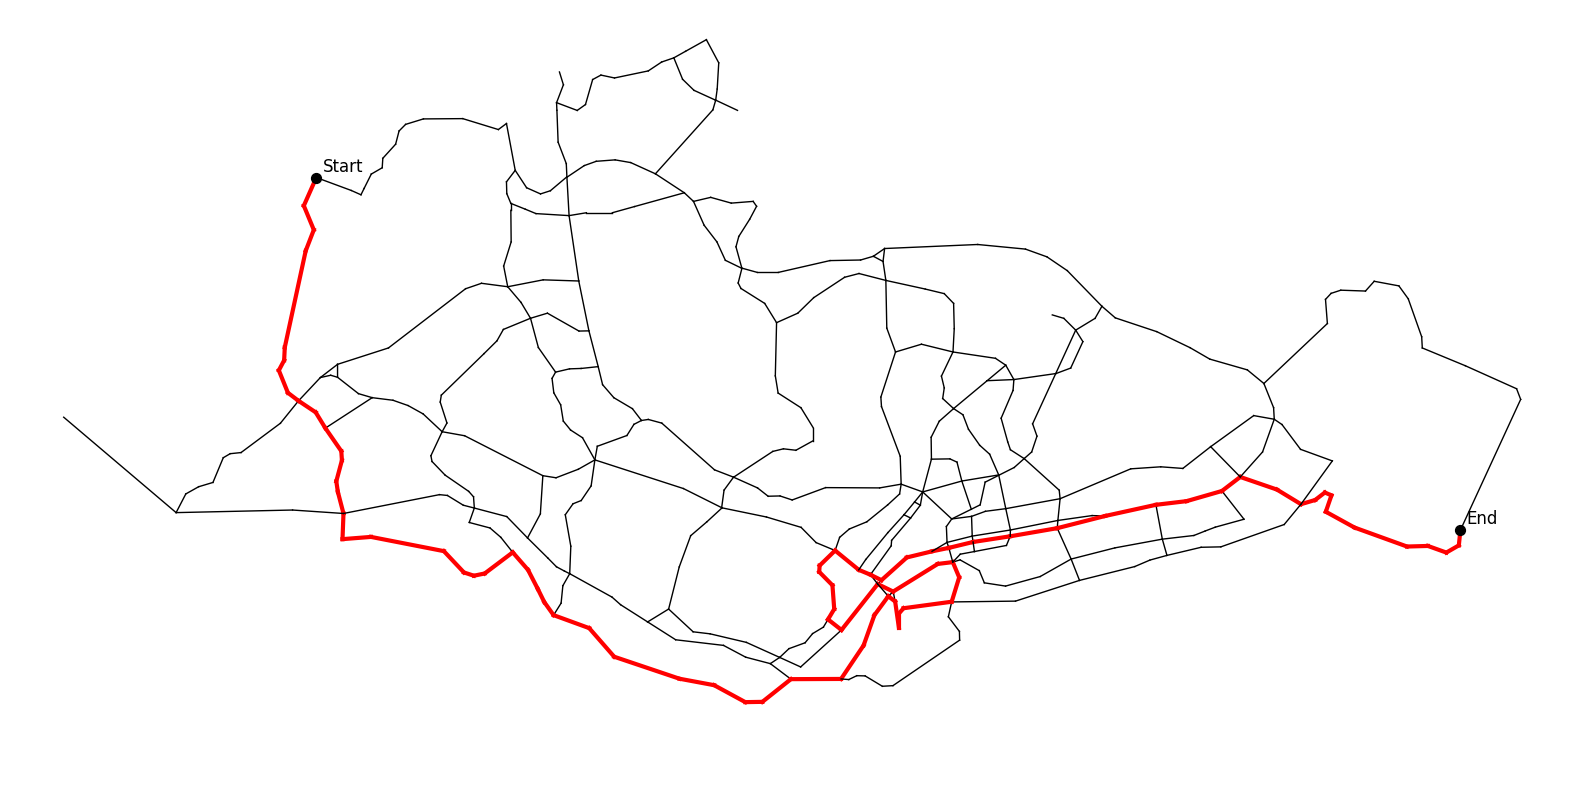

Running HEADRPP:   0%|          | 0/200 [00:00<?, ?it/s]

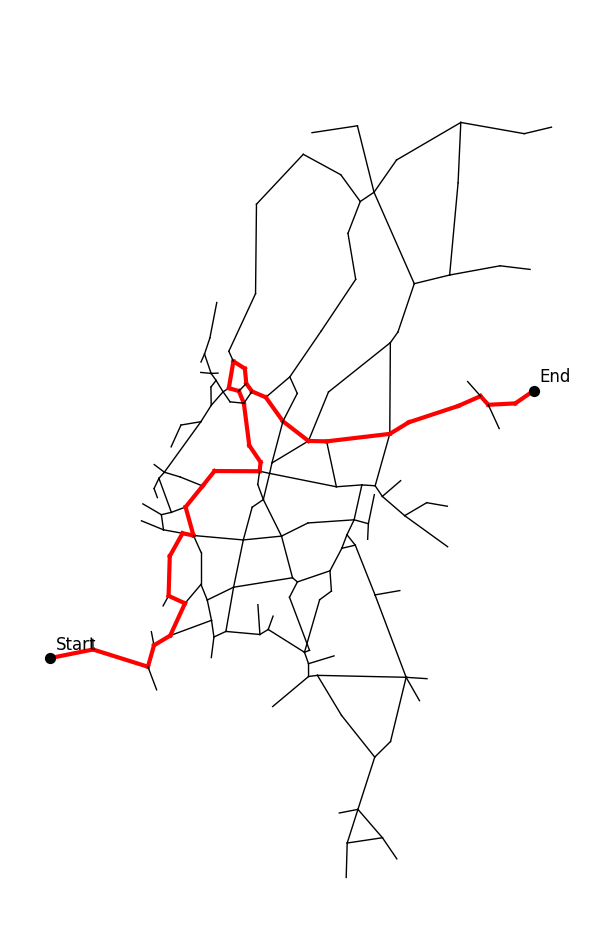

In [8]:
# HEADRPP algorithm

weights = [1/4, 1/4, 1/4, 1/4] # order: distance, traffic, pollution, hotspots

# Singapore
alg = headrpp.HEADRPP(repr_sp, nr_generations, start_node_sp, end_node_sp, pop_size_sp, weights, p_crossover, p_mutation, group_size)
results = alg.run_algorithm(show_results=False, save_name="images/singapore")
repr_sp.plot_map(results[1], plot_nodes=False, show_axes=False)

# Netherlands
alg = headrpp.HEADRPP(repr_nl, nr_generations, start_node_nl, end_node_nl, pop_size_nl, weights, p_crossover, p_mutation, group_size)
results = alg.run_algorithm(show_results=False, save_name="images/netherlands")
repr_nl.plot_map(results[1], plot_nodes=False, show_axes=False)

Running NSGA2:   0%|          | 0/200 [00:00<?, ?it/s]

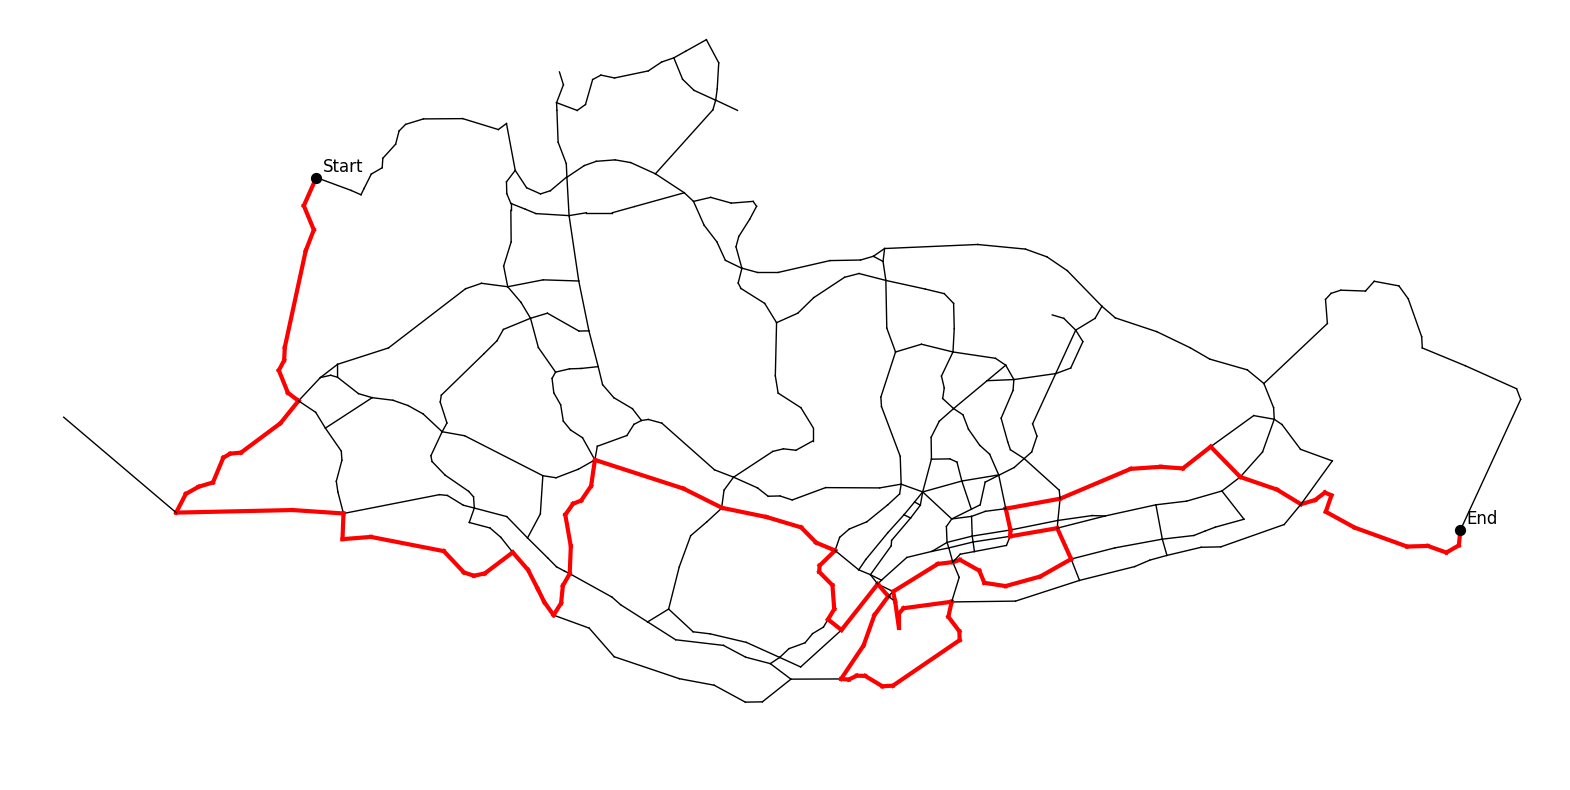

Running NSGA2:   0%|          | 0/200 [00:00<?, ?it/s]

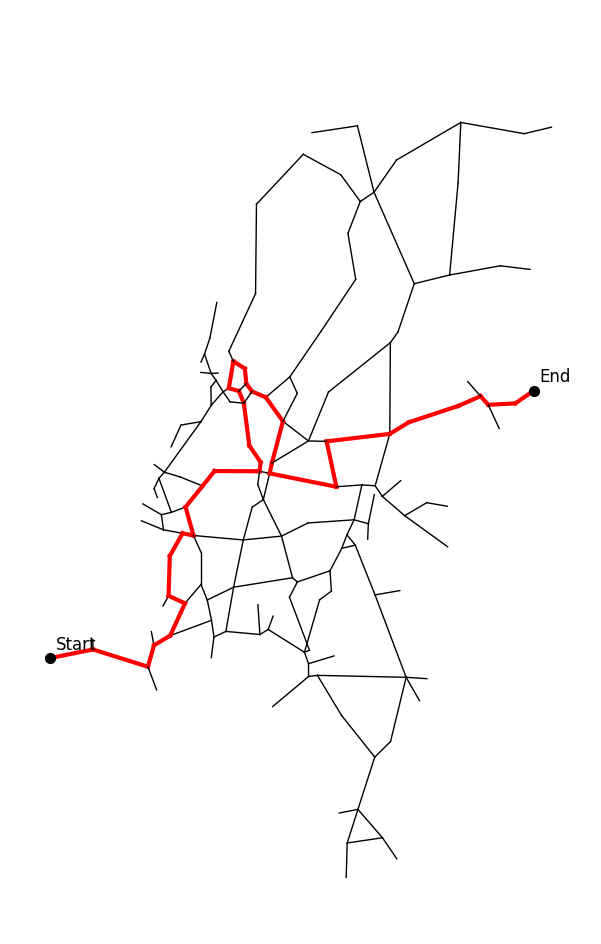

In [9]:
# NSGA2 algorithm

# Singapore
alg = nsga2.NSGA2(repr_sp, nr_generations, start_node_sp, end_node_sp, pop_size_sp, weights, p_crossover, p_mutation, group_size)
results = alg.run_algorithm(show_results=False, save_name="images/singapore")
repr_sp.plot_map(results[1], plot_nodes=False, show_axes=False)

# Netherlands
alg = nsga2.NSGA2(repr_nl, nr_generations, start_node_nl, end_node_nl, pop_size_nl, weights, p_crossover, p_mutation, group_size)
results = alg.run_algorithm(show_results=False, save_name="images/netherlands")
repr_nl.plot_map(results[1], plot_nodes=False, show_axes=False)